# Get Started with supervised learning (linear regression)            

#### We will implement a linear regression model with one parameter, step by step


1. First: Import the necessary libraries:
      - numpy: for performing statistical operations and data manipulation
      - matplotlib: for visualizing the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

2. Problem Statement:

As in the course, you will use the example of predicting house prices.
This exercise will use a simple dataset with only two data points.

| Size (m²) | Price (in 1000 MAD) |
|:---------:|:-------------------:|
|    1000   |         300          |
|    2000   |         500          |

You want to fit a linear regression model through these two points in order to predict the price for other houses, for example, a house with 1200 square meters.


3. define the variables of the size and price (named X_train and Y_train)

In [3]:
X_train = np.array([1.0, 2.0]) # we have to multiply the 1.0 with 1000 for obtaining the size in m2
Y_train = np.array([300.0, 500.0])
print(f'X_train : {X_train} and Y_train : {Y_train}')

X_train : [1. 2.] and Y_train : [300. 500.]


4. find the parameters n and m (n is the number of features in this case we have only one , m is the number of examples(rows of data)

In [4]:
# methode 1 without numpy:
m1 = len(X_train)
# methode 2 with numpy:
m2 = X_train.shape[0] # 0 is for m : the number of rows and 1 is for the number of columns
#display:
print(f'methode 1 ==> {m1} and methode 2 ==> {m2}')

methode 1 ==> 2 and methode 2 ==> 2


5. visualizing the data :
we can use scatter() form matplotlib 

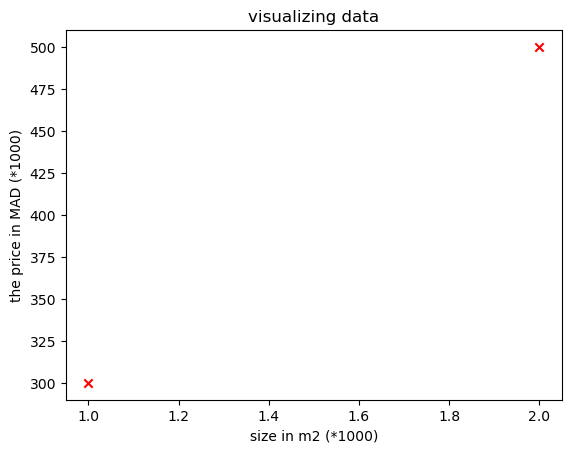

In [5]:
plt.scatter(X_train, Y_train, marker='x', c='r') # for the parameter marker is the form of the point in the visual and c is for the color red 
plt.title('visualizing data')  # for the title
plt.xlabel('size in m2 (*1000)')  
plt.ylabel('the price in MAD (*1000)')
plt.show() # showing the visual 


6. The model function for linear regression (which is a function that maps x to y is represented as:

f(x_i) = w. x_i + b

The above formula is how you can represent lines, where different values of w and b give different lines on the graph.
raph.


In [6]:
# for example :
w = 100
b = 100
print(f'w = {w}, b = {b}')

w = 100, b = 100


now we will create a function that calculate the predictions if we have w and b (y hat):

In [7]:
def prediction_linear_function(X_train, w, b):
    '''
    X_train : is the data without the target variable
    w : is the parameter of linear function
    b : is also the parameter of linear function
    return: we will return a list that contient the prediction of each row in the data sets 
    '''
    return [i * w + b for i in X_train]  

In [8]:
# execute the function:
Y_hat = prediction_linear_function(X_train, w, b)
print(Y_hat)

[200.0, 300.0]


7. we can calculate the error between the y and yhat or visualizing the difference :


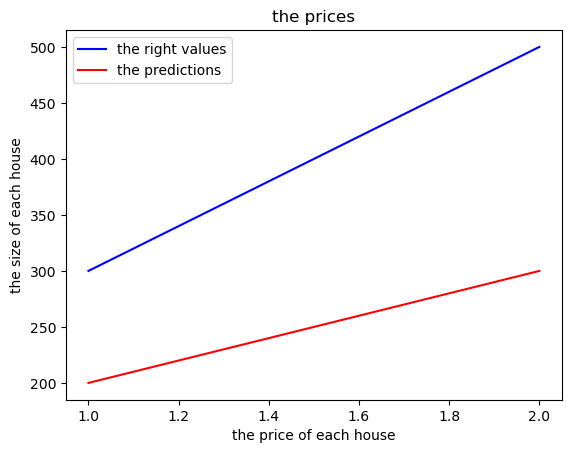

In [9]:
plt.plot(X_train, Y_train, c='b', label='the right values')
plt.plot(X_train, Y_hat, c='r', label='the predictions')
plt.title('the prices')
plt.xlabel('the price of each house')
plt.ylabel('the size of each house')
plt.legend()
plt.show()

###### Challenge: Try experimenting with different values of w and b. What should the values be for a line that fits our data?

###### so so.........................................

## implimenting the cost function (linear regression one dimension)

## Cost Calculation

The term "cost" in this task can be a bit confusing since the data involves housing prices. Here, "cost" refers to a measure of how accurately our model predicts the target price of the house. The term "price" is used for the housing data.

The cost equation with a single variable is:

\[
J(w, b) = \ frac{1}{2m} \sum_{i=1}^{m} \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)^2
\]

Where:

\[
f_{w,b}(x) = wx + b
\]

- \( w \) is the weight (slope),
- \( b \) is the bias (intercept),
- \( x \) represents the input features (e.g., house size),
- \( y \) is the actual target value (house price),
- \( m \) is the number of training examples.

This equation measures the squared differences between the model's predicted house prices and the actual house prices, averaged over all the training examples.


In [10]:
def cost_function(X, Y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost += (X[i] * w + b) - Y[i]
    return (1/(2*m)) * cost
        

In [11]:
#examples
print(cost_function(X_train, Y_train, 100, 100))
print(cost_function(X_train, Y_train, 120, 100))
print(cost_function(X_train, Y_train, 190, 100))
print(cost_function(X_train, Y_train, 200, 100))

-75.0
-60.0
-7.5
0.0


## Gradient descent 

we will calculate the gradient descente of the cost function to minimizing the cost:
Algorithm:
 repete this algo while the values of the cost is not the min:
   - inializing the parameters by default w = b =0
   - calculing the gradient of each value( for w and also for b)
   - updating the variables w and b


firsitly we will impliment a function that claculate the partial derivative

In [12]:
def compute_gradient(X, Y, w, b):
    m = X.shape[0]
    df_w = 0
    df_b = 0
    for i in range(m):
        df_w += ((X[i] * w + b) - Y[i]) * X[i]
        df_b += ((X[i] * w + b) - Y[i])
    df_w = (1/m) * df_w
    df_b = (1/m) * df_b

    return [df_w, df_b]


secondly we should have the function that calculate the cost every each step in gradient descente

 finaly we will impliment the algorithm :


In [13]:
import math

In [17]:
def gradient_descent(X, Y, w_in, b_in, alpha, num_iter, cost_function, compute_gradient):
    '''
    X : the data without the target variable
    Y: the target variable
    alpha: the learning rate
    num_iter : the number of iterations
    cost_function : -----
    compute_gradient : --------------

    '''
    histo_cost = []
    histo_parameters = []
    w = w_in
    b = b_in
    
    for i in range(num_iter):
        #1. calculate the gradient :
        df_w, df_b = compute_gradient(X, Y, w, b)

        #2. update the parameters :
        w = w - alpha * df_w
        b = b - alpha * df_b

        #3. append the parameters into lists:
        histo_cost.append(cost_function(X, Y, w, b))
        histo_parameters.append([w, b])

        #4. print the semi result every interval:
        if i % (math.ceil(num_iter / 10)) == 0:
            print(f"Iteration {i:4}: Cost {histo_cost[-1]:0.2e} ",
                f"df_w: {df_w: 0.3e}, df_b: {df_b: 0.3e} ",
                f"w: {w: 0.3e}, b:{b: 0.5e}")


    return w , b, histo_cost, histo_parameters

    

In [18]:
#examples :
w = 0
b = 0
w_final, b_final, J_hist, p_hist = gradient_descent(X=X_train, Y=Y_train, w_in=w, b_in=b, alpha=1e-2, num_iter=10000000, cost_function=cost_function, compute_gradient=compute_gradient)

Iteration    0: Cost -1.93e+02  df_w: -6.500e+02, df_b: -4.000e+02  w:  6.500e+00, b: 4.00000e+00
Iteration 1000000: Cost 3.55e-13  df_w: -1.421e-12, df_b:  7.105e-13  w:  2.000e+02, b: 1.00000e+02
Iteration 2000000: Cost 3.55e-13  df_w: -1.421e-12, df_b:  7.105e-13  w:  2.000e+02, b: 1.00000e+02
Iteration 3000000: Cost 3.55e-13  df_w: -1.421e-12, df_b:  7.105e-13  w:  2.000e+02, b: 1.00000e+02
Iteration 4000000: Cost 3.55e-13  df_w: -1.421e-12, df_b:  7.105e-13  w:  2.000e+02, b: 1.00000e+02
Iteration 5000000: Cost 3.55e-13  df_w: -1.421e-12, df_b:  7.105e-13  w:  2.000e+02, b: 1.00000e+02
Iteration 6000000: Cost 3.55e-13  df_w: -1.421e-12, df_b:  7.105e-13  w:  2.000e+02, b: 1.00000e+02
Iteration 7000000: Cost 3.55e-13  df_w: -1.421e-12, df_b:  7.105e-13  w:  2.000e+02, b: 1.00000e+02
Iteration 8000000: Cost 3.55e-13  df_w: -1.421e-12, df_b:  7.105e-13  w:  2.000e+02, b: 1.00000e+02
Iteration 9000000: Cost 3.55e-13  df_w: -1.421e-12, df_b:  7.105e-13  w:  2.000e+02, b: 1.00000e+02


In [20]:
#display the parameters
print(w_final)
print(b_final)
print(len(J_hist))
print(len(p_hist))

199.99999999999005
100.00000000001563
10000000
10000000


### making some predictions
predict the price of :
- 1000 m2
- 1200 m2
- 2000 m2

In [23]:
X_predict = [1.4, 1.2, 2.8]
print(prediction_linear_function(X_predict, w_final, b_final))

[380.0000000000017, 340.0000000000037, 659.9999999999877]
